A1.

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Data = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="marketing_campaign")

X = Data[["MntFruits", "MntMeatProducts"]]
y = Data["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("\n*** Training Data Metrics ***\n")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

# Test Metrics
cm_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("\n*** Test Data Metrics ***\n")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")



*** Training Data Metrics ***

Accuracy: 0.8839
Precision: 0.8715
Recall: 0.8839
F1 Score: 0.8714

*** Test Data Metrics ***

Accuracy: 0.8155
Precision: 0.7825
Recall: 0.8155
F1 Score: 0.7967


A2.

In [6]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

purchase_data = pd.read_excel("/content/Lab Session Data.xlsx", sheet_name="Purchase data")

purchase_data = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()
X = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = purchase_data['Payment (Rs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred_knn = knn_regressor.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Metrics:")
print(f"MSE: {mse_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"MAPE: {mape_knn:.2%}")
print(f"R2 Score: {r2_knn:.2f}")


KNN Regression Metrics:
MSE: 6280.92
RMSE: 79.25
MAPE: 44.12%
R2 Score: -0.61


A3.

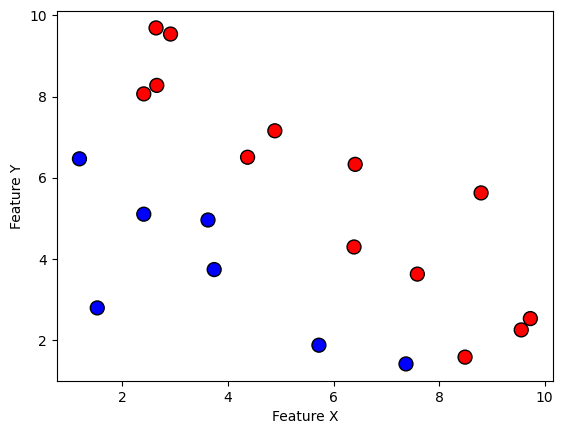

In [7]:
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

classes = np.where(X + Y < 10, 0, 1)
colors = np.where(classes == 0, 'blue', 'red')


plt.scatter(X, Y, c=colors, label="Training Data", edgecolors='k', s=100)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()


A4.

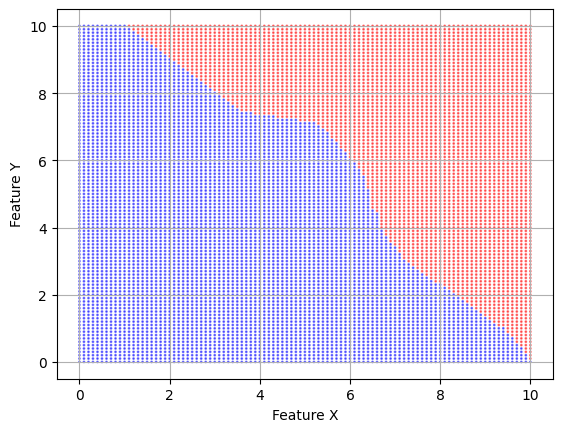

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_data = np.column_stack((X_train, Y_train))

train_classes = np.where(X_train + Y_train < 10, 0, 1)

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_classes)

predicted_classes = knn.predict(test_data)

plt.scatter(test_data[:, 0], test_data[:, 1], c=['blue' if c == 0 else 'red' for c in predicted_classes], s=1, alpha=0.5)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.show()

A5.

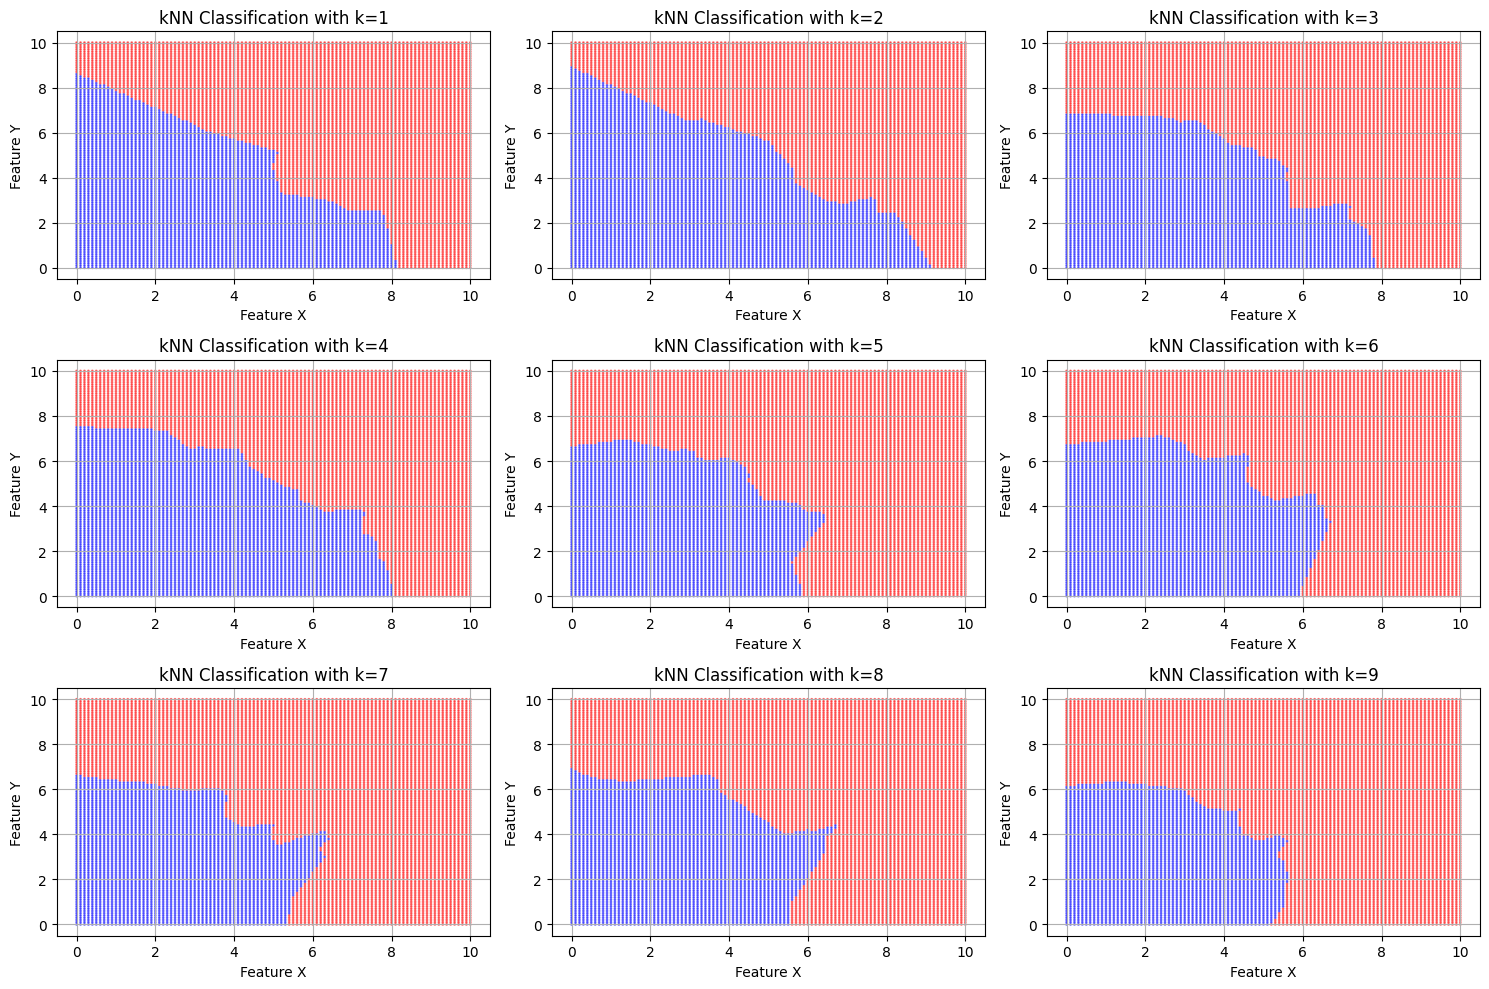

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_data = np.column_stack((X_train, Y_train))

train_classes = np.where(X_train + Y_train < 10, 0, 1)

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))


k_values = list(range(1,10))
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_classes)
    predicted_classes = knn.predict(test_data)

    plt.subplot(3, 3, i)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=['blue' if c == 0 else 'red' for c in predicted_classes], s=1, alpha=0.5)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification with k={k}")
    plt.grid(True)

plt.tight_layout()
plt.show()


A6.

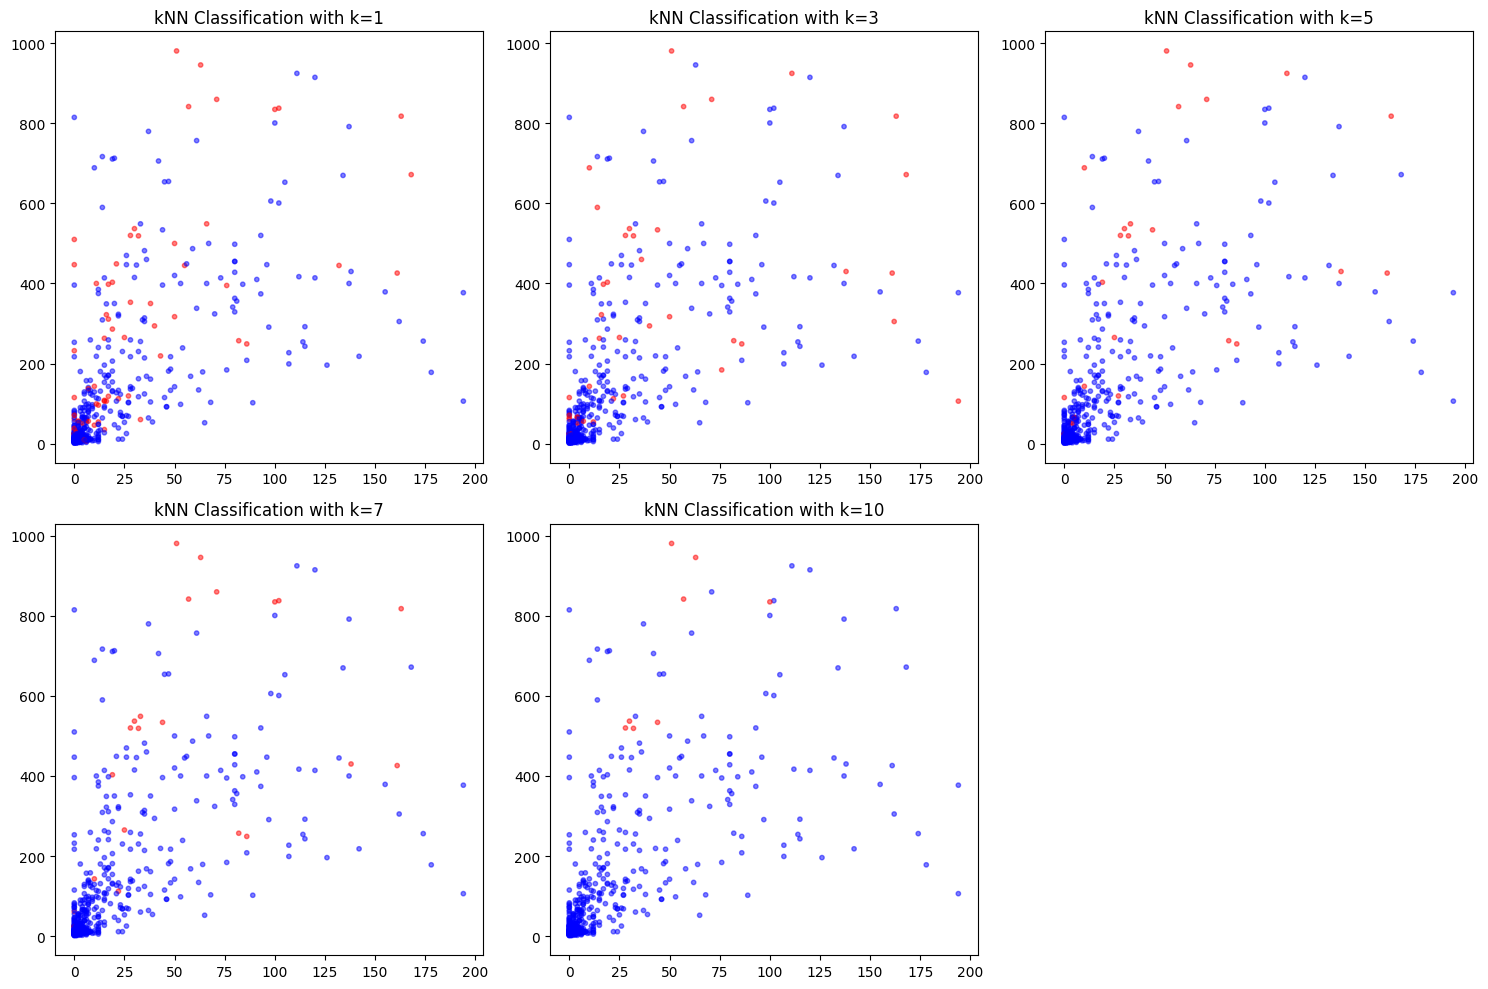

In [14]:


X = Data[["MntFruits","MntMeatProducts"]].values
y = Data["Response"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10]
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(X_test)

    plt.subplot(2, 3, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=['blue' if c == 0 else 'red' for c in predicted_classes], s=10, alpha=0.5)

    plt.title(f"kNN Classification with k={k}")

plt.tight_layout()
plt.show()


A7.

In [21]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value found: {best_k}")


param_dist = {'n_neighbors': np.arange(1, 21)}
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_k = random_search.best_params_['n_neighbors']
print(f"Best k value found: {best_k}")


Best k value found: 10
Best k value found: 19
